## Clasifiación de las flores de Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X=iris.data[:, :2]
Y=iris.target

In [4]:
x_min, x_max= X[:,0].min()-1, X[:, 0].max()+1
y_min, y_max= X[:, 1].min()-1, X[:, 1].max()+1
h=(x_max-x_min)/100
## creamos una grilla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_plot = np.c_[xx.ravel(), yy.ravel()]

In [5]:
## creamos el módelo predictorio
C=1.0
svc= svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)

In [6]:
Ypred=svc.predict(x_plot)
## convertirmos a la misma tamaño de distribucipon de la parrilla utilizada
Ypred=Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para flores de Iris con Kernel lineal')

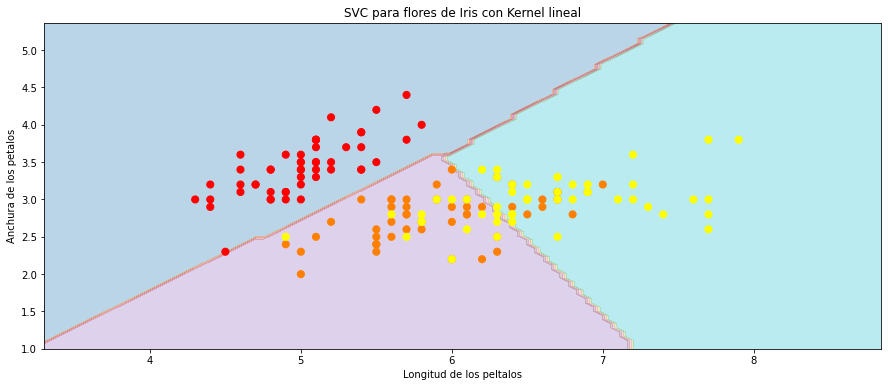

In [7]:
## dibujamos la predicción del módelo
plt.figure(figsize=(15,6))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
## pintamos los puntos
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.xlabel("Longitud de los peltalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para flores de Iris con Kernel lineal")

## División con kernel radial

In [8]:
## creamos el módelo predictorio
C=1.0
svc= svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)

In [9]:
Ypred=svc.predict(x_plot)
## convertirmos a la misma tamaño de distribucipon de la parrilla utilizada
Ypred=Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para flores de Iris con Kernel lineal')

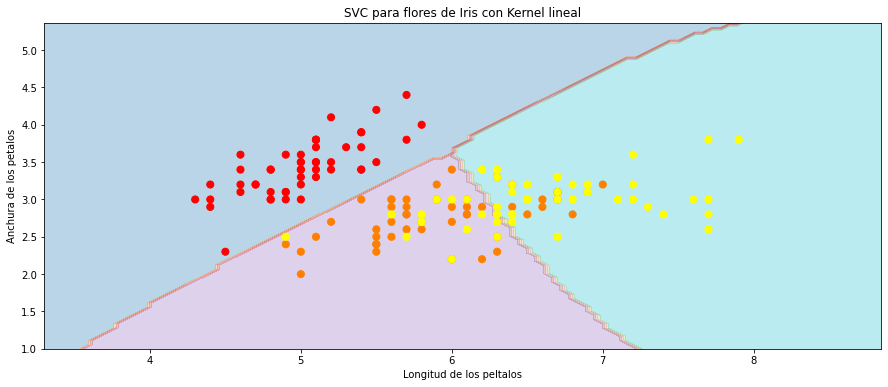

In [10]:
## dibujamos la predicción del módelo
plt.figure(figsize=(15,6))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
## pintamos los puntos
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.xlabel("Longitud de los peltalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para flores de Iris con Kernel lineal")

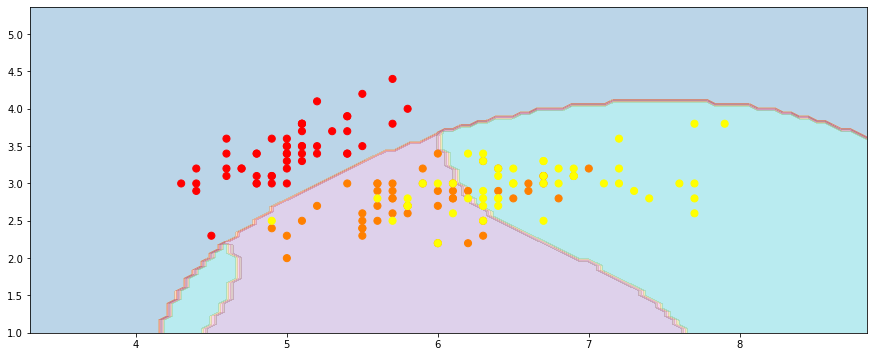

In [11]:

modelo= svm.SVC(kernel="rbf",gamma=0.101, C=800, decision_function_shape="ovr").fit(X,Y)
## predecimos
ypred=modelo.predict(x_plot)
ypred=ypred.reshape(xx.shape)
## dibujamos
plt.figure(figsize=(15,6))
plt.contourf(xx,yy, ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

In [12]:
## buscamos los valores optimos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [13]:
## mezclamos data
x, y =shuffle(X,Y, random_state=0)

In [14]:
## creamos la data de entrenamiento y de testing
x_train, x_test, y_train, t_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [15]:
## parametros para ver cual es el más ótimo
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [0.97,0.1,0.101,0.102],
        'C': [900, 1000, 1100]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [16]:
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [900, 1000, 1100],
                          'gamma': [0.97, 0.1, 0.101, 0.102],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [17]:
clf.best_params_

{'C': 900, 'gamma': 0.101, 'kernel': 'rbf'}

In [18]:
## creamos el módelo predictorio
C=1.0
svc= svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)

In [19]:
clf.cv_results_

{'mean_fit_time': array([0.00618334, 0.00259385, 0.0015954 , 0.00139647, 0.00438786,
        0.00139623, 0.00159693, 0.0015955 , 0.00518622, 0.00139561,
        0.00139627, 0.00159669, 0.00079813, 0.00079813, 0.00179534,
        0.00678334]),
 'std_fit_time': array([0.00132285, 0.00101641, 0.00048893, 0.00048858, 0.00101684,
        0.00048848, 0.0004893 , 0.00048901, 0.00159587, 0.00048879,
        0.00048873, 0.00048911, 0.00039907, 0.00039907, 0.00074643,
        0.00612806]),
 'mean_score_time': array([0.00079832, 0.00079799, 0.00059886, 0.00039873, 0.00019984,
        0.00059905, 0.00019937, 0.00039883, 0.00019956, 0.00039892,
        0.00019956, 0.        , 0.00019951, 0.00019946, 0.00079789,
        0.00039878]),
 'std_score_time': array([0.00039916, 0.00074629, 0.00048897, 0.00048834, 0.00039968,
        0.00048913, 0.00039873, 0.00048846, 0.00039911, 0.00048858,
        0.00039911, 0.        , 0.00039902, 0.00039892, 0.00039895,
        0.0004884 ]),
 'param_C': masked_array(d

In [20]:
#promedio
means=clf.cv_results_["std_score_time"]
## desviación estandar
stds=clf.cv_results_["std_score_time"]
# parametros
params=clf.cv_results_["std_score_time"]
for m,s,p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.000 (+/-0.001) para 0.0003991605132985345
0.001 (+/-0.001) para 0.0007462892278367692
0.000 (+/-0.001) para 0.0004889669762803781
0.000 (+/-0.001) para 0.0004883440543553797
0.000 (+/-0.001) para 0.0003996849060058594
0.000 (+/-0.001) para 0.000489127940290806
0.000 (+/-0.001) para 0.0003987312316894531
0.000 (+/-0.001) para 0.0004884608551226126
0.000 (+/-0.001) para 0.0003991127014160156
0.000 (+/-0.001) para 0.0004885776558898482
0.000 (+/-0.001) para 0.0003991127014160156
0.000 (+/-0.000) para 0.0
0.000 (+/-0.001) para 0.000399017333984375
0.000 (+/-0.001) para 0.0003989219665527344
0.000 (+/-0.001) para 0.00039894604707137513
0.000 (+/-0.001) para 0.000488402483835603


In [21]:
y_predic=clf.predict(x_test)

In [22]:
print(classification_report(t_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.69      0.69      0.69        16
           2       0.44      0.44      0.44         9

    accuracy                           0.74        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.74      0.74      0.74        38



In [23]:
print(classification_report(t_test, y_predic, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.69      0.69      0.69        16
   virginica       0.44      0.44      0.44         9

    accuracy                           0.74        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.74      0.74      0.74        38



## Resumen final de la clasificación de iris

In [28]:
def function_iris(kernel_proporcionado="rbf", C=1, gamma=.001):
    iris=datasets.load_iris()
    iris
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets

    X=iris.data[:, :2]
    Y=iris.target
    x_min, x_max= X[:,0].min()-1, X[:, 0].max()+1
    y_min, y_max= X[:, 1].min()-1, X[:, 1].max()+1
    h=(x_max-x_min)/100
    ## creamos una grilla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    x_plot = np.c_[xx.ravel(), yy.ravel()]
    ## creamos el módelo predictorio
    
    svc= svm.SVC(kernel=kernel_proporcionado, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred=svc.predict(x_plot)
    ## convertirmos a la misma tamaño de distribucipon de la parrilla utilizada
    Ypred=Ypred.reshape(xx.shape)

    ## dibujamos la predicción del módelo
    plt.figure(figsize=(15,6))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    ## pintamos los puntos
    plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt.xlabel("Longitud de los peltalos")
    plt.ylabel("Anchura de los petalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para flores de Iris con Kernel lineal")


In [25]:
from ipywidgets import interact, fixed

In [ ]:
interact(function_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

In [26]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>

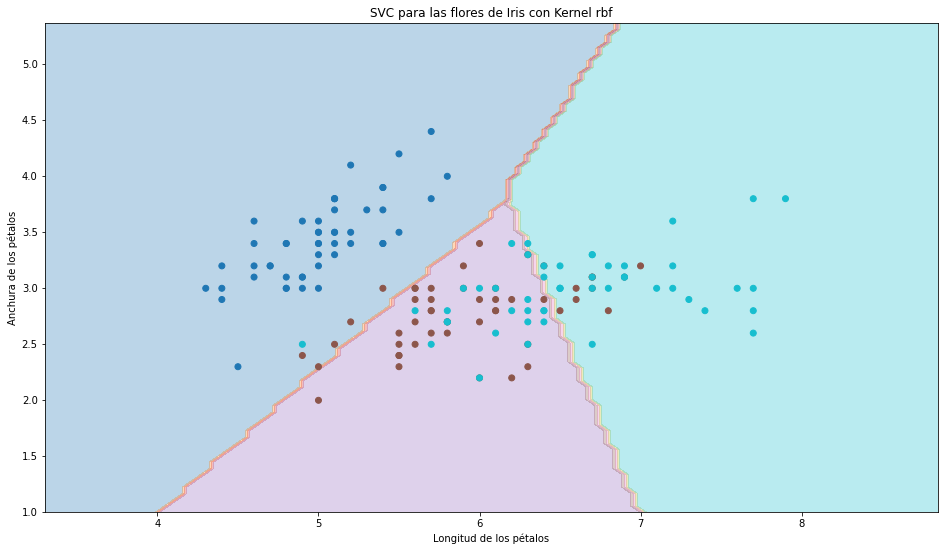

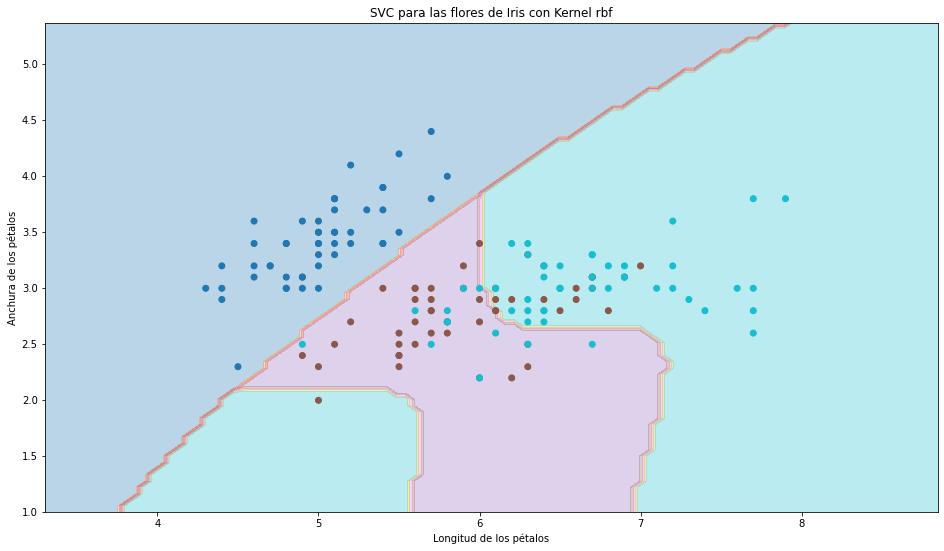

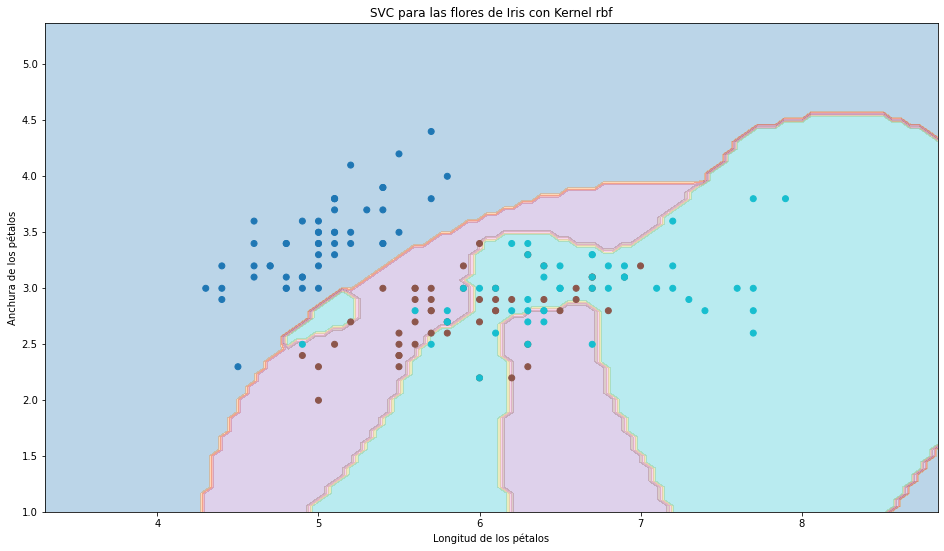

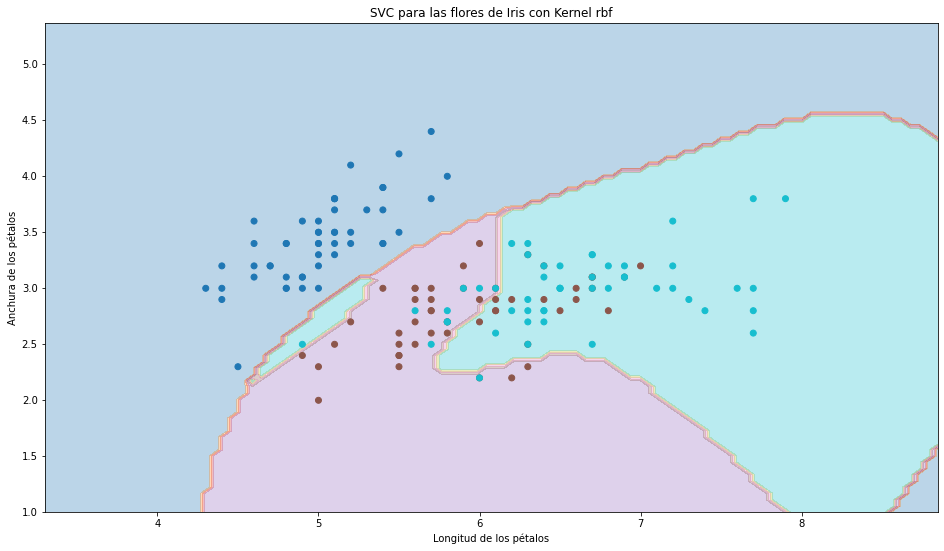

In [30]:

interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])
